In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

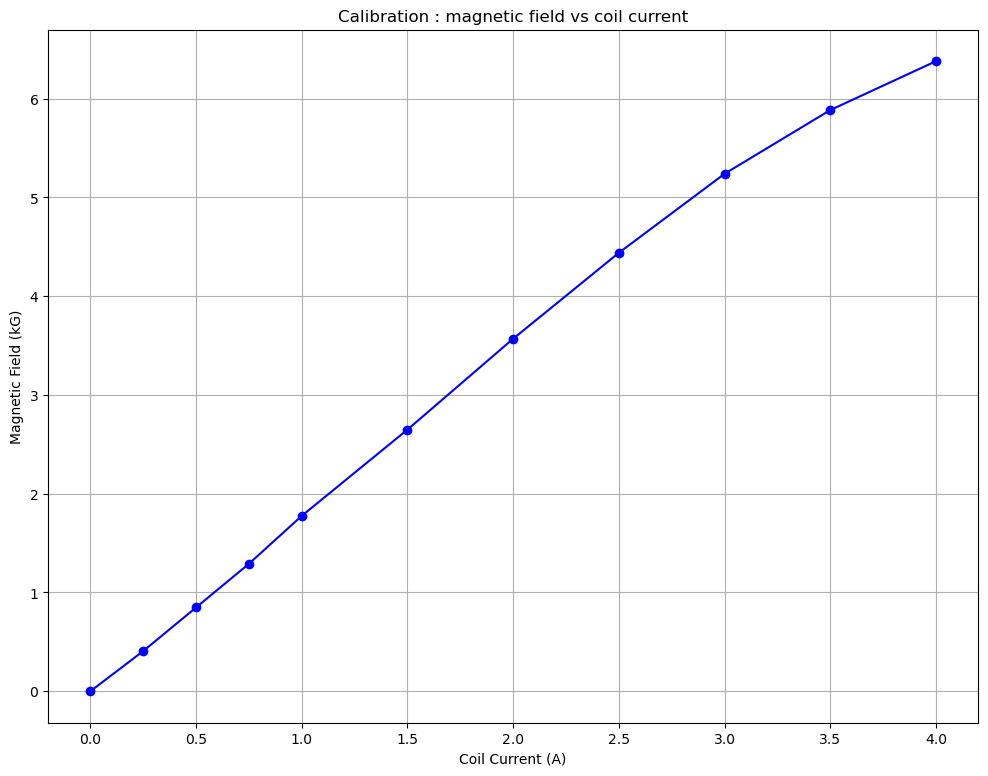

In [8]:
calib_df = pd.read_csv("calib.csv")
curr = calib_df["Calib"].to_numpy()
field = calib_df["Field"].to_numpy()
field = field/1000

fig, ax = plt.subplots(figsize=(12,9))
ax.plot(curr, field, "bo-")
ax.set_xlabel("Coil Current (A)")
ax.set_ylabel("Magnetic Field (kG)")
ax.grid()
ax.set_title("Calibration : magnetic field vs coil current")
plt.savefig("calib.jpeg", bbox_inches="tight", dpi=130)
plt.show()
plt.close()

In [18]:
n05a, n205ma, p1a, p481ma = pd.read_csv("n0.5a.csv"), pd.read_csv("n2.05ma.csv"), pd.read_csv("p1a.csv"), pd.read_csv("p4.81ma.csv")
dfs = [n05a, p1a, n205ma, p481ma]
fnames = ["n05a", "p1a", "n205ma", "p481ma" ]
titles = [r"$0.5\,A$", r"$1.0\,A$", r"$2.05\,mA$", r"$4.81\,mA$"]
titles2 = ["n-type Ge", "p-type Ge", "n-type Ge", "p-type Ge"]
i = 0
for df in dfs:
    if (df.columns[0] == "probecurrent"):
        probecurrent = df["probecurrent"]
        hallvoltage = df["hallvoltage"]
        fig, ax = plt.subplots(figsize=(12,9))
        ax.plot(probecurrent, hallvoltage, "bo-")
        ax.set_xlabel("Probe Current (mA)")
        ax.set_ylabel("Hall Voltage (mV)")
        ax.set_title(f"Hall voltage vs Probe current ({titles2[i]}, Coil current = {titles[i]})")
        ax.grid()
        plt.savefig(fnames[i] + ".jpeg", bbox_inches="tight", dpi=120)
        plt.close()
        i = i + 1
    else:
        field = df["Field"]
        hallvoltage = df["hallvoltage"]
        fig, ax = plt.subplots(figsize=(12,9))
        ax.plot(field, hallvoltage, "bo-")
        ax.set_xlabel("Magnetic field (kG)")
        ax.set_ylabel("Hall Voltage (mV)")
        ax.set_title(f"Hall voltage vs Magnetic field ({titles2[i]}, Probe current = {titles[i]})")
        ax.grid()
        plt.savefig(fnames[i] + ".jpeg", bbox_inches="tight", dpi=120)
        plt.close()
        i = i + 1